In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
files = glob.glob("C:/Users/workspace/brad_public_workspace_on_win/SH_tongliang/data/commodities_data/12_28_commodities_daily/*.csv")
file_len = len(files)

# Create functions to process & build csv files in a format of concatted dataframe:

- Specifically for the format of file name: e.g. a9000_d.csv

- Specially for the downloaded data files from TB

In [3]:
def read_and_add_tickers(file):
    df = pd.read_csv(file, header=None, sep = ',')
    ticker = file.split("\\",1)[1].split(".",1)[0].split("_",1)[0]
    df['ticker'] = ticker
    return df

# all_csv_files format example:"C:/Users/12_28_commodities_daily/*.csv"
def concat_files_inside_folders(all_csv_files):
    files = glob.glob(all_csv_files)
    dfs = [read_and_add_tickers(file) for file in files]
    futuresdata = pd.concat(dfs,ignore_index=True)
    futuresdata.columns = ['date', 'open', 'high', 'low', 'close', 'volume', 'holdings', 'ticker']
    return futuresdata

In [4]:
# Test the function:
data = concat_files_inside_folders("C:/Users/workspace/brad_public_workspace_on_win/SH_tongliang/data/commodities_data/12_28_commodities_daily/*.csv")

In [9]:
data.head(3)

,date,open,high,low,close,volume,holdings,ticker
0,1994/09/15,2220.0,2224.0,2220.0,2220.0,0,3689,a9000
1,1994/09/16,2228.0,2228.0,2210.0,2210.0,0,3574,a9000
2,1994/09/19,2196.0,2220.0,2196.0,2220.0,0,3438,a9000


# Create functions to generate statistical analyses for all tickers' data

This part is based on the dataframe we have generated from Step One.

## Correlation Heatmap

In [17]:
data_ = data[['date', 'close', 'ticker']]
data_.head(3)

,date,close,ticker
0,1994/09/15,2220.0,a9000
1,1994/09/16,2210.0,a9000
2,1994/09/19,2220.0,a9000


In [13]:
# Generate a ticker list for later use.
def create_ticker_list(all_csv_files):
    ticker_list = []
    files = glob.glob(all_csv_files)
    for file in files:
        ticker = file.split("\\",1)[1].split(".",1)[0].split("_",1)[0]
        ticker_list.append(ticker)
    return ticker_list

ticker_list = create_ticker_list("C:/Users/workspace/brad_public_workspace_on_win/SH_tongliang/data/commodities_data/12_28_commodities_daily/*.csv")

In [18]:
# Create a new column for the percentage change of each ticker's close price
data_['pct_chg'] = data_.groupby(['ticker'])['close'].apply(lambda x: x.pct_change())

C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
# Check if the first pct_chg for each ticker is NaN, is so, then good to proceed.
print (data_[data_['ticker']=='a9000'].head(3))
print (data_[data_['ticker']=='zn000'].head(3))

         date   close ticker   pct_chg
0  1994/09/15  2220.0  a9000       NaN
1  1994/09/16  2210.0  a9000 -0.004505
2  1994/09/19  2220.0  a9000  0.004525
             date    close ticker   pct_chg
80254  2007/03/26  29175.0  zn000       NaN
80255  2007/03/27  29670.0  zn000  0.016967
80256  2007/03/28  29523.0  zn000 -0.004954


In [30]:
# create a ticker_dfs as a data table list, separated by tickers, for later merging's purpose.
def choose_df_on_tickers(ticker, main_df):
    ticker_df = main_df[main_df['ticker']==ticker]
    return ticker_df

ticker_dfs = [choose_df_on_tickers(ticker, data_) for ticker in ticker_list]

In [35]:
# Trim each ticker's data table's columns to only date and pct_chg
# And then change the pct_chg column name to each ticker's name for later correlation plotting's purpose
def choose_pct_col_df(ticker_df):
    ticker_col = ticker_df['ticker'].values[1]
    ticker_df_trimmed = ticker_df[['date', 'pct_chg']]
    ticker_df_trimmed.columns = ['date', ticker_col]
    return ticker_df_trimmed

# ticker_df_trimmed is still a list including all tickers' data tables
ticker_df_trimmed = [choose_pct_col_df(ticker_df) for ticker_df in ticker_dfs]

In [50]:
# Create the first merged dataframe using the first two tickers' data
merged = ticker_df_trimmed[0].merge(ticker_df_trimmed[1], on = 'date', how='outer')

In [51]:
merged.head(2)

,date,a9000,ag000
0,1994/09/15,NaN,NaN
1,1994/09/16,-0.004505,NaN


In [43]:
# Check each ticker data's date range:
def check_dt_range(ticker_list, ticker_df_trimmed):
    for i in range(0, len(ticker_list)+1):
        try: 
            print ('------------------------')
            print ("ticker {}: ".format(i+1), ticker_df_trimmed[i].columns[1])
            print ("start_date", ticker_df_trimmed[i]['date'].values[0])
            print ("end_date", ticker_df_trimmed[i]['date'].values[-1])
        except IndexError:
            print ("Hit the last one. Done")
            
check_dt_range(ticker_list, ticker_df_trimmed)

------------------------
ticker 1:  a9000
start_date 1994/09/15
end_date 2018/12/28
------------------------
ticker 2:  ag000
start_date 2012/05/10
end_date 2018/12/28
------------------------
ticker 3:  al000
start_date 1994/10/08
end_date 2018/12/28
------------------------
ticker 4:  AP000
start_date 2017/12/25
end_date 2018/12/28
------------------------
ticker 5:  au000
start_date 2008/01/09
end_date 2018/12/28
------------------------
ticker 6:  bu000
start_date 2013/10/09
end_date 2018/12/28
------------------------
ticker 7:  c9000
start_date 2004/09/22
end_date 2018/12/28
------------------------
ticker 8:  CF000
start_date 2004/06/01
end_date 2018/12/28
------------------------
ticker 9:  cu000
start_date 1996/04/03
end_date 2018/12/28
------------------------
ticker 10:  hc000
start_date 2014/03/21
end_date 2018/12/28
------------------------
ticker 11:  i9000
start_date 2013/10/18
end_date 2018/12/28
------------------------
ticker 12:  IC000
start_date 2015/04/16
end_date 

In [55]:
def merge_the_rest(ticker_list, merged, ticker_df_trimmed):
    for i in range(2, len(ticker_list)):
        merged = merged.merge(ticker_df_trimmed[i], on = 'date', how='outer')
        all_merged = merged.copy()
    return all_merged

all_merged = merge_the_rest(ticker_list, merged, ticker_df_trimmed)

In [61]:
all_merged.sort_values('date', inplace=True)

In [62]:
all_merged.tail()

,date,a9000,ag000,al000,AP000,au000,bu000,c9000,CF000,cu000,...,sp000,SR000,T9000,TA000,TF000,TS000,v9000,y9000,ZC000,zn000
5798,2018/12/24,0.003641,0.000278,-0.001089,-0.003682,0.002284,-0.008727,-0.016595,-0.008262,-0.006815,...,-0.012714,-0.010217,-0.001032,-0.018182,-0.000354,0.000350,0.002322,0.004815,0.005302,-0.022360
5799,2018/12/25,0.005441,0.000278,0.002907,0.004597,0.005784,-0.053558,0.008710,-0.022326,-0.002079,...,0.002817,-0.005987,0.002531,-0.027609,0.001416,0.000050,-0.011583,-0.010321,-0.016526,-0.001946
5800,2018/12/26,0.001503,0.006401,0.000725,-0.000897,0.001394,-0.002326,0.003778,0.005112,0.000417,...,-0.012440,0.002908,0.002576,0.001385,0.001313,0.000549,0.010156,0.001490,-0.003575,0.002925
5801,2018/12/27,0.004503,0.006084,-0.009051,-0.003503,-0.004177,0.025641,-0.002151,0.005426,0.005207,...,0.002844,-0.018430,0.000154,-0.001037,-0.000151,0.000050,0.000000,-0.002603,0.010405,-0.000243
5802,2018/12/28,0.005081,0.010170,-0.003654,0.011176,0.002621,0.000000,0.007004,-0.004722,-0.002694,...,0.004862,-0.008439,0.004367,-0.014192,0.002572,0.000799,-0.005414,-0.001119,0.004972,-0.001459


In [57]:
corr_matrix = all_merged[all_merged.columns[1:]].corr()

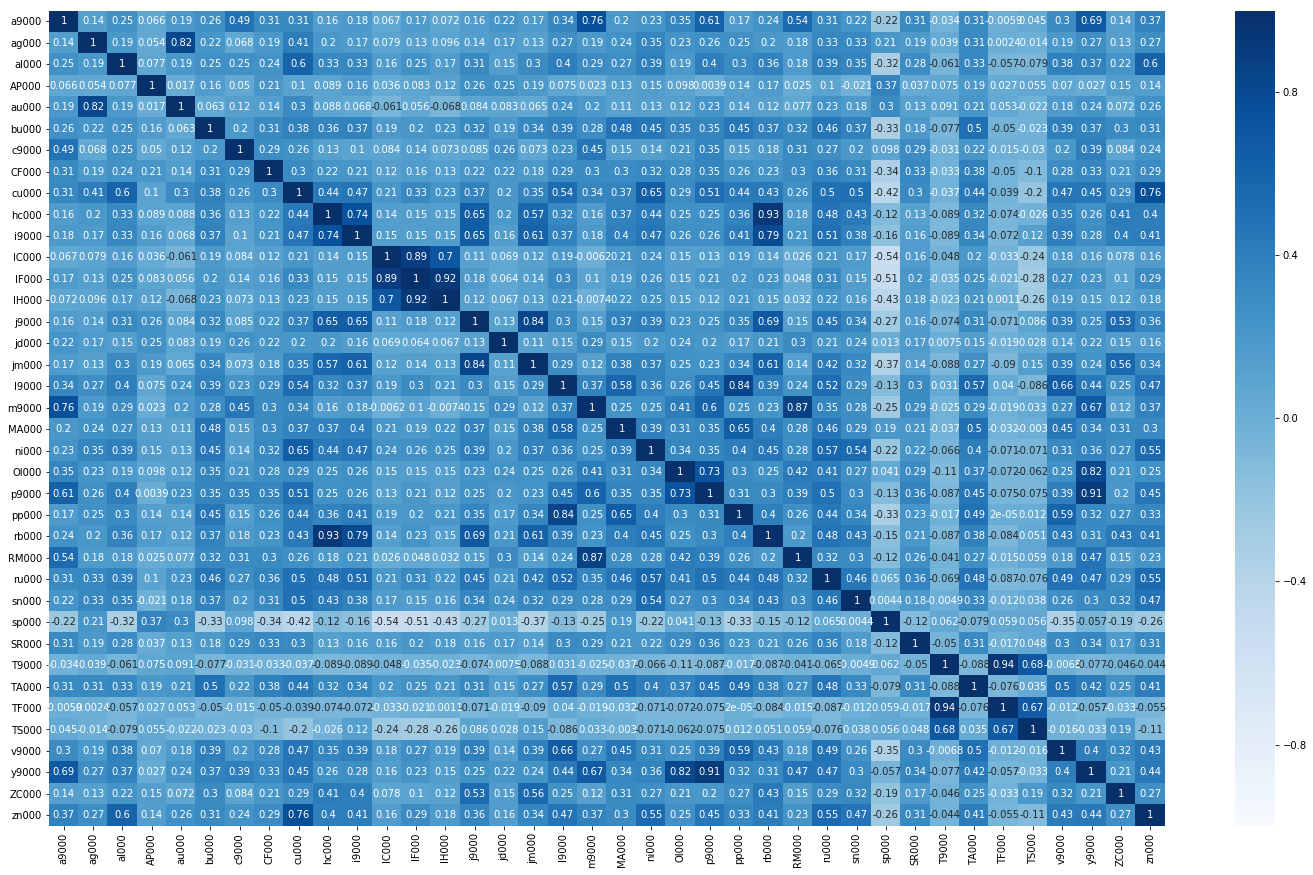

In [58]:
fig, ax = plt.subplots(figsize = (25, 15))
sns.heatmap(corr_matrix, ax = ax, cmap = 'Blues', vmax = 1.0, vmin = -1.0, annot=True)